# 2022/01/08/SAT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1) 
temp= np.array([-10.2, -5.2, 0.1, 10.1, 12.2, 14.7,25.4, 26.8, 28.9, 35.1, 32.2, 34.6])
ϵ1= np.random.normal(size=12,scale=5)
icecream= 20 + temp * 2 + ϵ1 

In [2]:
np.random.seed(2) 
ϵ2= np.random.normal(size=12,scale=5) 
disease = 30+ temp* 0.5 + ϵ2

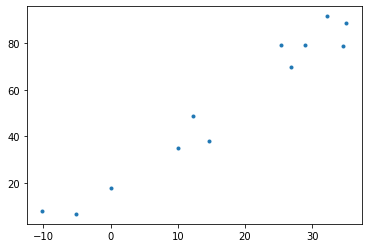

In [3]:
plt.plot(temp,icecream,'.')

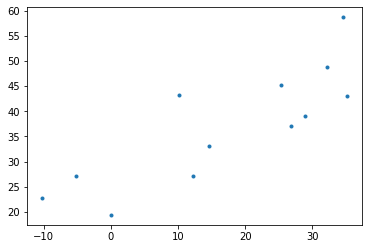

In [4]:
plt.plot(temp,disease,'.')

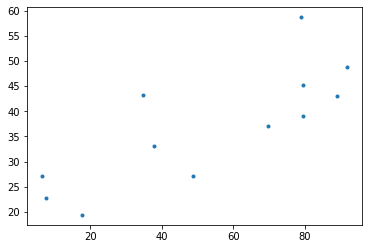

In [5]:
plt.plot(icecream,disease,'.') # 아이스크림 & 소아마비

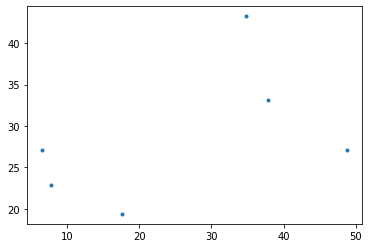

In [6]:
plt.plot(icecream[:6],disease[:6],'.')
# 비슷한 온도로 관찰 -> 선형관계 약해짐

---------------------------------

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/extremum.csv')

In [8]:
df.columns

Index(['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최고기온시각', '최저기온(℃)',
       '최저기온시각일교차', 'Unnamed: 8'],
      dtype='object')

In [9]:
pd.Series(df.columns)

0          지점번호
1           지점명
2            일시
3       평균기온(℃)
4       최고기온(℃)
5        최고기온시각
6       최저기온(℃)
7     최저기온시각일교차
8    Unnamed: 8
dtype: object

In [10]:
temp=np.array(df.iloc[:,3]) # 평균기온 열
len(temp) #평균기온에 해당되는 행 656개

656

In [11]:
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 

In [12]:
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease=temp*0.5 + 40 +ϵ2

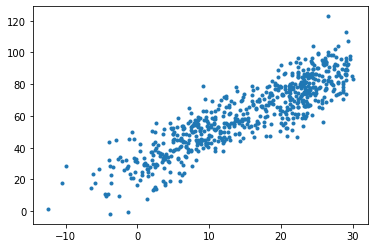

In [13]:
plt.plot(temp,icecream,'.')

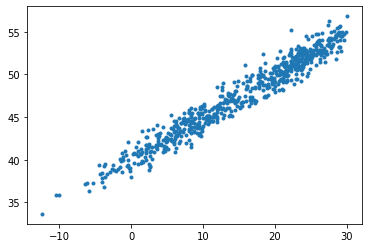

In [14]:
plt.plot(temp,disease,'.')

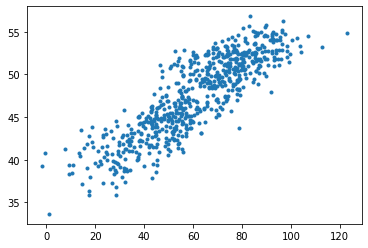

In [15]:
plt.plot(icecream,disease,'.')

In [16]:
np.corrcoef(icecream,disease) #상관계수 -> 인과관계 의미 x

array([[1.        , 0.86298975],
       [0.86298975, 1.        ]])

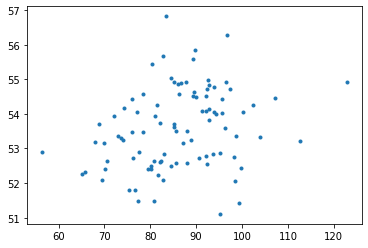

In [17]:
plt.plot(icecream[temp>25],disease[temp>25], '.') # 비슷한 온도구간 관찰 -> 선형관계 약해짐

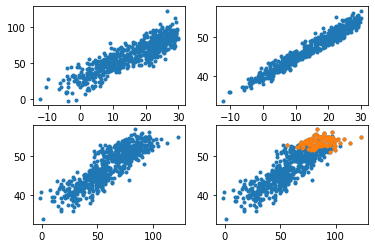

In [18]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2) 
ax1.plot(temp,icecream,'.')
ax2.plot(temp,disease,'.')
ax3.plot(icecream,disease,'.')
ax4.plot(icecream,disease,'.')
ax4.plot(icecream[temp>25],disease[temp>25],'.')

> ### `온도구간 카테고리화`

In [19]:
df1=pd.DataFrame({'temp':temp, 'icecream':icecream, 'disease':disease})

In [20]:
df1

,temp,icecream,disease
0,-0.5,45.243454,39.333242
1,1.4,26.682436,40.643733
2,2.6,29.918282,39.163804
3,2.0,23.270314,42.640271
4,2.5,43.654076,39.456564
...,...,...,...
651,19.9,78.839992,49.633906
652,20.4,86.554679,48.920443
653,18.3,78.666079,49.882650
654,12.8,52.771364,46.613159


In [21]:
df1.temp

0      -0.5
1       1.4
2       2.6
3       2.0
4       2.5
       ... 
651    19.9
652    20.4
653    18.3
654    12.8
655     6.7
Name: temp, Length: 656, dtype: float64

<AxesSubplot:>

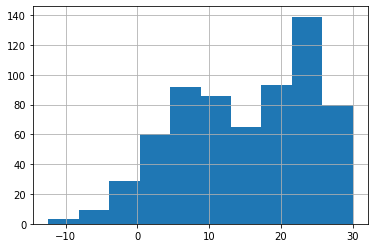

In [22]:
df1.temp.hist() # = plt.hist(df1.temp)

In [23]:
def f(x): 
    if x<0: y='group0'
    elif x<10: y='group10'
    elif x<20: y='group20'
    else: y='group30'
    return y 

In [24]:
df1['temp2']=list(map(f,df1.temp))

In [25]:
df1

,temp,icecream,disease,temp2
0,-0.5,45.243454,39.333242,group0
1,1.4,26.682436,40.643733,group10
2,2.6,29.918282,39.163804,group10
3,2.0,23.270314,42.640271,group10
4,2.5,43.654076,39.456564,group10
...,...,...,...,...
651,19.9,78.839992,49.633906,group20
652,20.4,86.554679,48.920443,group30
653,18.3,78.666079,49.882650,group20
654,12.8,52.771364,46.613159,group20


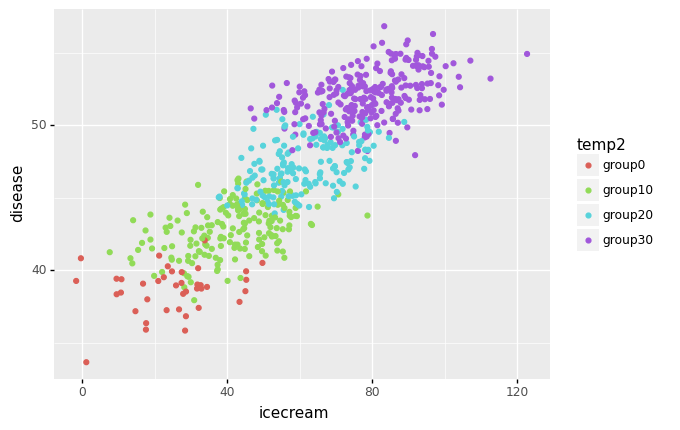

<ggplot: (120959691903)>

In [26]:
from plotnine import * 
ggplot(df1)+geom_point(aes(x='icecream',y='disease',color='temp2'))

C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


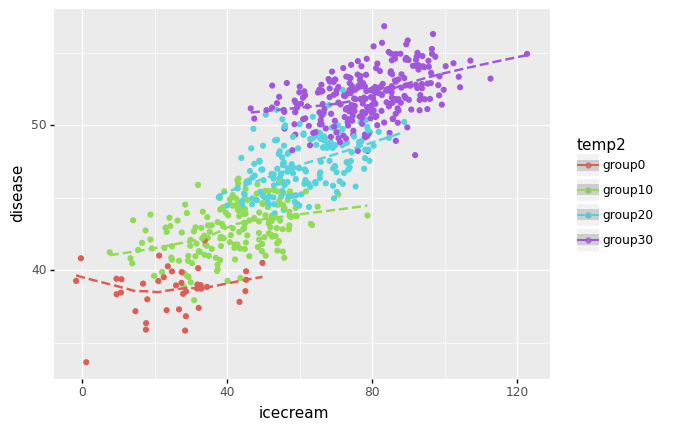

<ggplot: (120949679559)>

In [27]:
ggplot(df1)+geom_point(aes(x='icecream',y='disease',color='temp2'))\
+geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=1,linetype='dashed')

C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


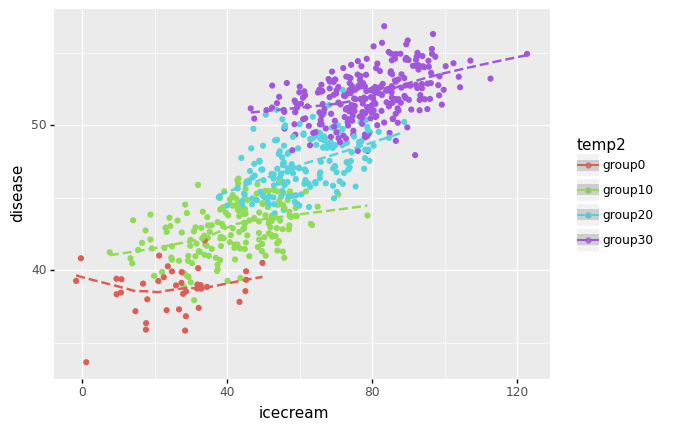

<ggplot: (120959836549)>

In [28]:
# 위 셀하고 동일
ggplot(df1,aes(x='icecream',y='disease'))+geom_point(aes(color='temp2'))\
+geom_smooth(aes(color='temp2'),size=1,linetype='dashed')

만약 아이스크림과 질병이 연관있는 경우라면

In [29]:
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease= 30+ temp*0.0 + icecream*0.15 +ϵ2*2 # 식 자체 정의를 달리해야 함

In [31]:
df2=pd.DataFrame({'temp':temp,'icecream':icecream,'disease':disease})
df2['temp2']=list(map(f,df2.temp)) # map을 이용하여 기존df에 자료 추가해주려면 list로 !!

C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


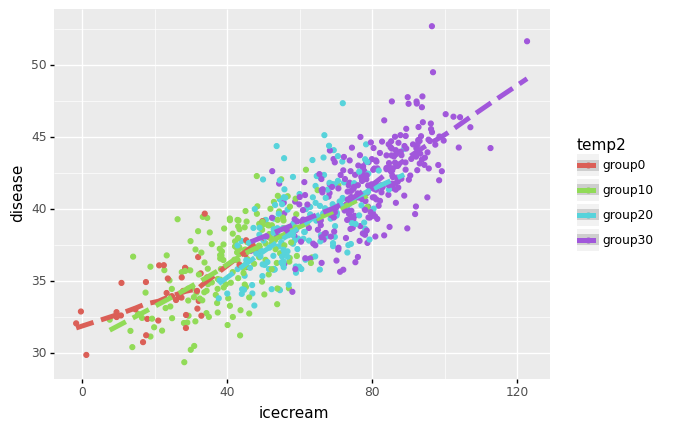

<ggplot: (120959800808)>

In [32]:
ggplot(df2)+geom_point(aes(x='icecream',y='disease',colour='temp2'))\
+geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=2,linetype='dashed')

In [33]:
df1.corr()

,temp,icecream,disease
temp,1.000000,0.884366,0.975609
icecream,0.884366,1.000000,0.862990
disease,0.975609,0.862990,1.000000


In [34]:
df2.corr()

,temp,icecream,disease
temp,1.000000,0.884366,0.725505
icecream,0.884366,1.000000,0.830539
disease,0.725505,0.830539,1.000000


---